<a href="https://colab.research.google.com/github/Geez-l/litoX/blob/nov-21/litox_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay


In [7]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21.0,28.5,3.05
1,120004,43.1,33.05,28.15,21.0,28.5,3.05
2,130004,43.1,33.05,28.15,21.0,28.5,3.05
3,140004,43.1,33.05,28.15,21.0,28.5,3.05
4,150004,43.1,33.05,28.15,21.0,28.5,3.05


In [6]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
female_litob = pd.read_csv(female_url)

female_litob.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21.0,28.5,3.05
1,120004,43.1,33.05,28.15,21.0,28.5,3.05
2,130004,43.1,33.05,28.15,21.0,28.5,3.05
3,140004,43.1,33.05,28.15,21.0,28.5,3.05
4,150004,43.1,33.05,28.15,21.0,28.5,3.05


# Assign labels to male and female dataset

In [8]:
female_litob['Label'] = 0
male_litob['Label'] = 1

In [13]:
female_litob.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label
0,110004,43.1,33.05,28.15,21.0,28.5,3.05,0
1,120004,43.1,33.05,28.15,21.0,28.5,3.05,0
2,130004,43.1,33.05,28.15,21.0,28.5,3.05,0
3,140004,43.1,33.05,28.15,21.0,28.5,3.05,0
4,150004,43.1,33.05,28.15,21.0,28.5,3.05,0


In [9]:

litob_combined = pd.concat([female_litob, male_litob], ignore_index=True)
litob_combined.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label
0,110004,43.1,33.05,28.15,21.0,28.5,3.05,0
1,120004,43.1,33.05,28.15,21.0,28.5,3.05,0
2,130004,43.1,33.05,28.15,21.0,28.5,3.05,0
3,140004,43.1,33.05,28.15,21.0,28.5,3.05,0
4,150004,43.1,33.05,28.15,21.0,28.5,3.05,0


<ipython-input-12-a0e89a90c7f5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=litob_combined, palette= 'pastel')


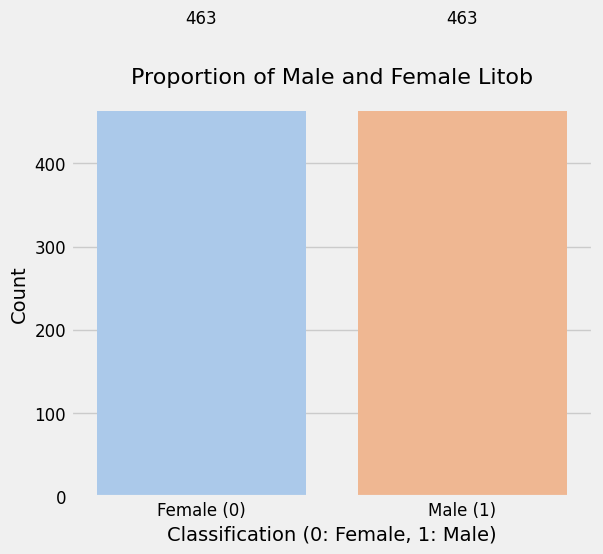

Proportions of Classes:
Label
0    0.5
1    0.5
Name: count, dtype: float64


In [12]:
#### plot visualizations for the no. of ham and spam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))
sns.countplot(x='Label', data=litob_combined, palette= 'pastel')
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

## calculating the counts
counts = litob_combined['Label'].value_counts().sort_index()

for index in counts.index:
    plt.text(index, counts[index] + 100, str(counts[index]), ha='center', va='bottom', fontsize=12)

## plot visualizations
plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()
proportions = counts / counts.sum()
print('Proportions of Classes:')
print(proportions)

In [ ]:
litob_combined.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'label'],
      dtype='object')

In [ ]:
litob_features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos']

In [ ]:
for feature in litob_features:
    if not pd.api.types.is_numeric_dtype(litob_combined[feature]):
        # If not numeric, apply string operations for cleaning
        litob_combined[feature] = litob_combined[feature].astype(str).str.replace(' ', '').str.replace(',', '')
        litob_combined[feature] = pd.to_numeric(litob_combined[feature], errors='coerce')
    else:
        # If already numeric, skip string operations
        print(f"Column '{feature}' is already numeric. Skipping string operations.")

Column 'Width' is already numeric. Skipping string operations.
Column 'Rib count' is already numeric. Skipping string operations.
Column 'Length (Hinge Line)' is already numeric. Skipping string operations.
Column 'Distance Umbos' is already numeric. Skipping string operations.


In [ ]:
x = litob_combined[litob_features]
y = litob_combined['label']

In [ ]:
#from google.colab import files
#litob_combined.to_csv('litob_combined.csv', encoding = 'utf-8-sig')
#files.download('litob_combined.csv')

In [ ]:
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,label
0,10001,48.05,37.6,32.15,20.0,33.55,4.1,0
1,20001,48.05,37.6,32.15,20.0,33.55,4.1,0
2,30001,48.05,37.6,32.15,20.0,33.55,4.1,0
3,40001,48.05,37.6,32.15,20.0,33.55,4.1,0
4,50001,48.05,37.6,32.15,20.0,33.55,4.1,0
...,...,...,...,...,...,...,...,...
476,120080,NaN,NaN,NaN,NaN,NaN,NaN,1
477,130080,NaN,NaN,NaN,NaN,NaN,NaN,1
478,140080,NaN,NaN,NaN,NaN,NaN,NaN,1
479,150080,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
litob_combined.dropna(inplace=True)

In [ ]:
x = litob_combined[litob_features]
y = litob_combined['label']

#(A) LOGISTIC REGRESSION

In [ ]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  6,   3],
       [  0, 127]])

Text(0.5, 427.9555555555555, 'Predicted label')

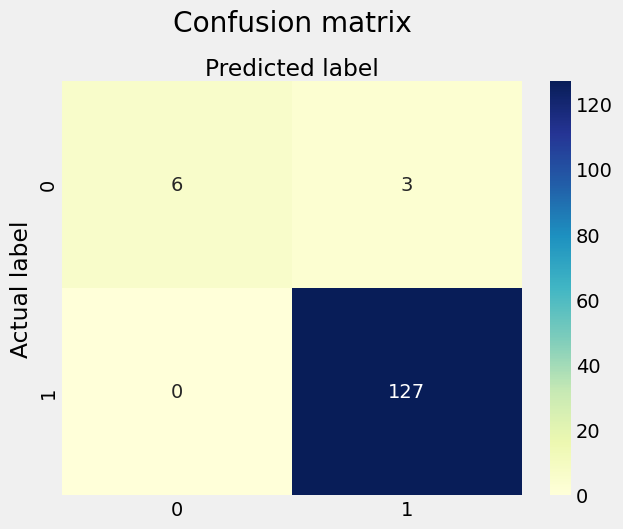

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.98      1.00      0.99       127

    accuracy                           0.98       136
   macro avg       0.99      0.83      0.89       136
weighted avg       0.98      0.98      0.98       136



In [ ]:
#roc curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NameError: name 'X_test' is not defined

# (B) Extreme Gradient Boosting

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

# Predict probabilities for ROC curve
y_pred_proba_xgb = xgb_model.predict_proba(x_test)[:, 1]

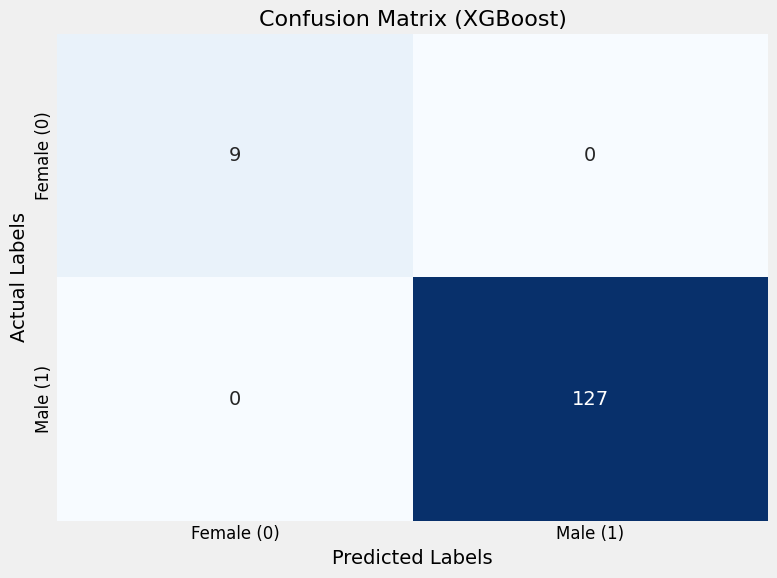

In [ ]:
# Confusion Matrix
cnf_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)

# Plotting
class_names = ['Female (0)', 'Male (1)']
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cnf_matrix_xgb, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
ax.set_title('Confusion Matrix (XGBoost)', fontsize=16)
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('Actual Labels', fontsize=14)
ax.set_xticks(np.arange(len(class_names)) + 0.5)
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticks(np.arange(len(class_names)) + 0.5)
ax.set_yticklabels(class_names, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report (XGBoost):")
print(metrics.classification_report(y_test, y_pred_xgb, target_names=target_names))
# Di ko bala shore


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00       127

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



In [ ]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_proba_xgb)

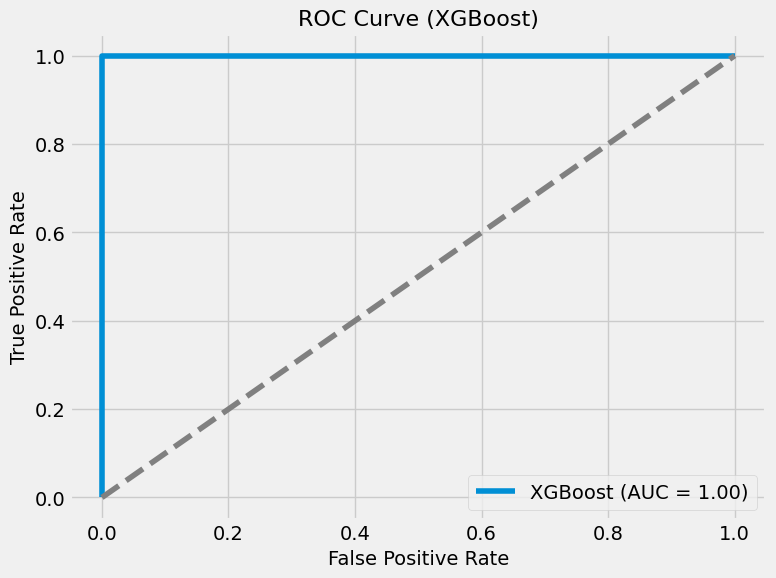

In [ ]:
# Plot ROC Curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve (XGBoost)', fontsize=16)
plt.legend(loc='lower right')
plt.show()

# (C) Linear regression


In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Convert continuous predictions to binary values (thresholding at 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

Mean Squared Error: 0.04091952692990947
R-squared: 0.33784114602309223


Text(0.5, 427.9555555555555, 'Predicted label')

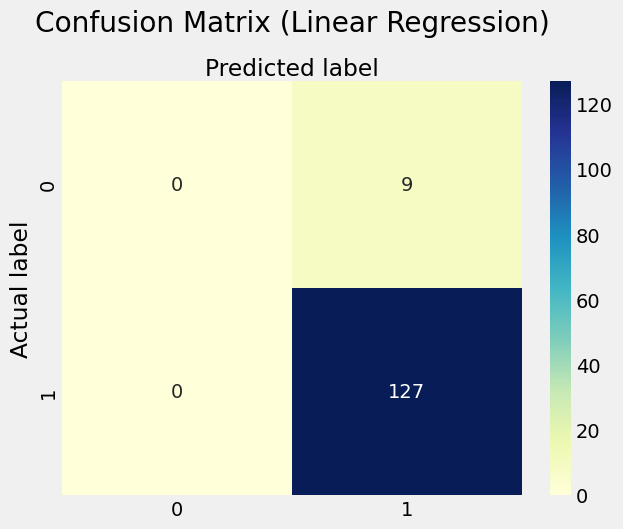

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_binary)
class_names = [0, 1]  # Female: 0, Male: 1

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix (Linear Regression)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary, target_names=["Female (0)", "Male (1)"]))

              precision    recall  f1-score   support

  Female (0)       0.00      0.00      0.00         9
    Male (1)       0.93      1.00      0.97       127

    accuracy                           0.93       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.87      0.93      0.90       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# (D) Random Forest Regressor

In [ ]:
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on training data
random_forest_reg.fit(x_train, y_train)

# Predict
y_pred_rf_reg = random_forest_reg.predict(x_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf_reg)
print(f'Mean Squared Error (MSE) for Random Forest Regressor: {mse_rf:.2f}')

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_percentage_error(y_test, y_pred_rf_reg)
print(f'Mean Absolute Error (MAE) for Random Forest Regressor: {mae_rf:.2f}')

# Calculate R-squared value (R²)
r2_rf = r2_score(y_test, y_pred_rf_reg)
print(f'R-squared (R²) for Random Forest Regressor: {r2_rf:.2f}')

Mean Squared Error (MSE) for Random Forest Regressor: 0.00
Mean Absolute Error (MAE) for Random Forest Regressor: 9934410942729.04
R-squared (R²) for Random Forest Regressor: 1.00


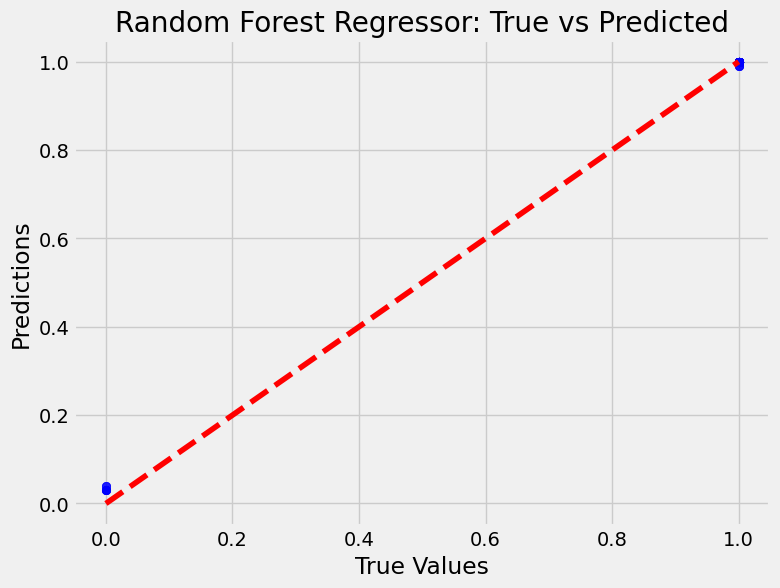

In [ ]:
# Plotting the true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_reg, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor: True vs Predicted')
plt.show()

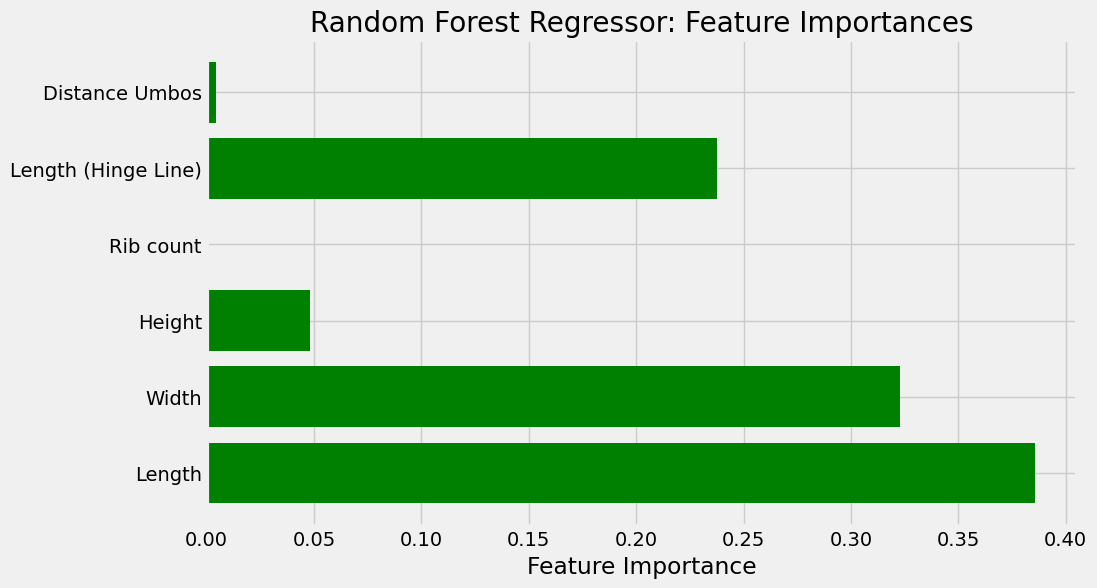

In [ ]:
# Plotting feature importance
feature_importances = random_forest_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(litob_features, feature_importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Random Forest Regressor: Feature Importances')
plt.show()